In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from RoadDataset import RoadDataset
from MultiRoadDataset import MultiRoadDataset

In [2]:
train_datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(train_datasets_path)
train_dataset_paths = [[train_datasets_path + sub_dir + "/" + sub_dir + ".csv", train_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
train_dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [3]:
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
my_batch_size = 16
multi_train_dataset = MultiRoadDataset(column_names, batch_size=my_batch_size)

for train_dataset_path in train_dataset_paths:
    multi_train_dataset.addRoadDataset(train_dataset_path[0], train_dataset_path[1])
    

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv
Loaded dataset with 8096 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv
Loaded dataset with 3775 samples
Reading csv file: ../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv
Failed to read csv file!
Loaded dataset with 0 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv
Loaded dataset with 7060 samples
Reading csv file: ../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv
Loaded dataset with 3112 samples
Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv
Loaded dataset with 17985 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 2020.csv
Loaded dataset with 2793 samples
Reading csv file: ../notebooks/datasets/train/

In [4]:
multi_train_dataset.clean()

Cleaning dataset. Starting with 8096 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 389 rows for reason: High SWA (> +180/ < -180 deg)
Removing 1666 rows for reason: Low speed (< 25 km/h)
Removing 141 rows for reason: Left blinker on
Removing 42 rows for reason: Right blinker on
5855 samples remaining.
Cleaning dataset. Starting with 3775 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 425 rows for reason: High SWA (> +180/ < -180 deg)
Removing 862 rows for reason: Low speed (< 25 km/h)
Removing 90 rows for reason: Left blinker on
Removing 221 rows for reason: Right blinker on
2174 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: High SWA (> +180/ < -180 deg)
Removing 0 rows for reason: L

/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")
/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")


Removing 105 rows for reason: Left blinker on
Removing 644 rows for reason: Right blinker on
13521 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: High SWA (> +180/ < -180 deg)
Removing 0 rows for reason: Low speed (< 25 km/h)
Removing 0 rows for reason: Left blinker on
Removing 0 rows for reason: Right blinker on
0 samples remaining.
Cleaning dataset. Starting with 31859 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 689 rows for reason: High SWA (> +180/ < -180 deg)
Removing 2788 rows for reason: Low speed (< 25 km/h)
Removing 312 rows for reason: Left blinker on
Removing 1066 rows for reason: Right blinker on
27001 samples remaining.
Cleaning dataset. Starting with 13594 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after

/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")


Removing 522 rows for reason: High SWA (> +180/ < -180 deg)
Removing 6777 rows for reason: Low speed (< 25 km/h)
Removing 82 rows for reason: Left blinker on
Removing 42 rows for reason: Right blinker on
1568 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: High SWA (> +180/ < -180 deg)
Removing 0 rows for reason: Low speed (< 25 km/h)
Removing 0 rows for reason: Left blinker on
Removing 0 rows for reason: Right blinker on
0 samples remaining.
Cleaning dataset. Starting with 23141 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 517 rows for reason: High SWA (> +180/ < -180 deg)
Removing 1838 rows for reason: Low speed (< 25 km/h)
Removing 431 rows for reason: Left blinker on
Removing 792 rows for reason: Right blinker on
19560 samples remaining.
Cleaning dataset. S

In [5]:
#multi_train_dataset.balance()

# SWA distribution:

In [18]:
# get a decent amount of samples
swas_non_augmented = []
swas_augmented = []
swas_augmented_normalized = []

for i in range(1000):
    sample = multi_train_dataset.get_sample(i, augment=False, crop=True, normalize=False)
    actual_swa = sample['swa']
    swas_non_augmented.append(actual_swa)
    
    sample = multi_train_dataset.get_sample(i, augment=True, crop=True, normalize=False)
    actual_swa = sample['swa']
    swas_augmented.append(actual_swa)
    
    sample = multi_train_dataset.get_sample(i, augment=True, crop=True, normalize=True)
    actual_swa = sample['swa']
    swas_augmented_normalized.append(actual_swa)

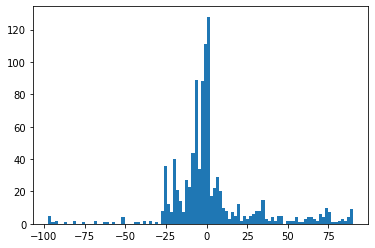

In [7]:
plt.hist(swas_non_augmented, bins=100)
plt.show()

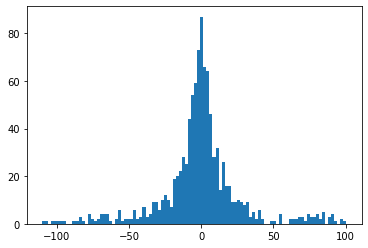

In [8]:
plt.hist(swas_augmented, bins=100)
plt.show()

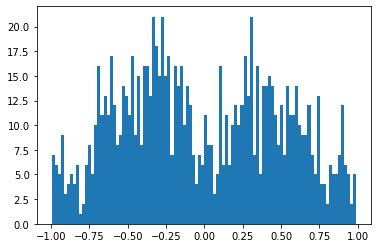

In [9]:
plt.hist(swas_augmented_normalized, bins=100)
plt.show()

# SWA vs speed:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


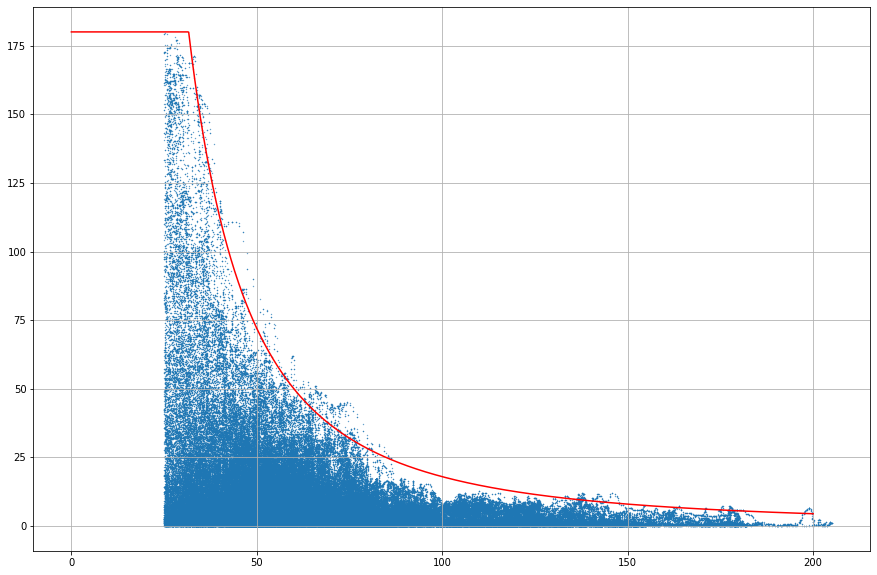

In [10]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
speeds = multi_train_dataset.get_csv()['speed']

#remove -999 dummy speed value
no_speeds_indices = speeds[speeds < 0].index
speeds = speeds.drop(no_speeds_indices)
swas = swas.drop(no_speeds_indices)
swas = abs(swas)


from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(x=speeds, y=swas, s=.1)

vel = np.linspace(0, 200, 1000)
envelope = 180000/(vel**2)
envelope = np.clip(envelope, 0, 180)

plt.plot(vel, envelope, color='red')

#plt.ylim(0, 50)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


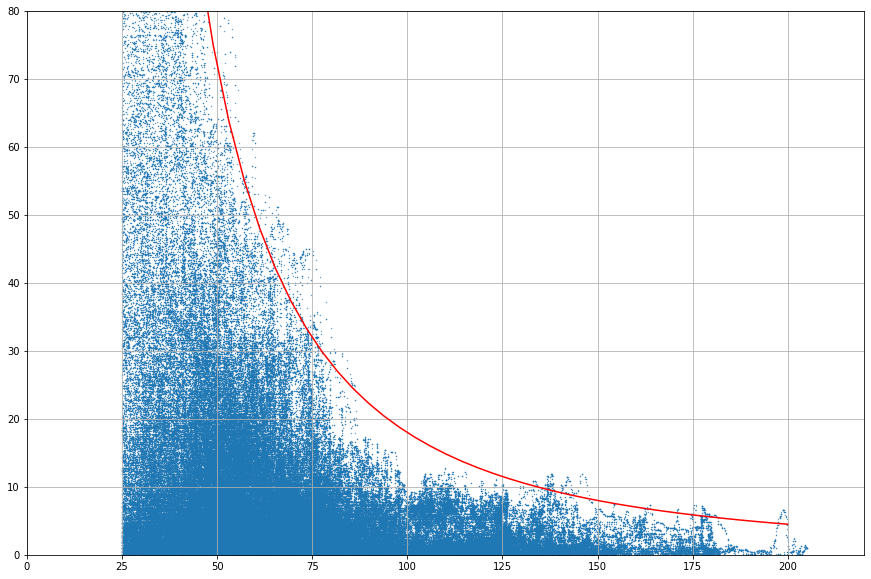

In [11]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.scatter(x=speeds, y=swas, s=.1)

vel = np.linspace(0, 200)
envelope = 180000/(vel**2)
envelope = np.clip(envelope, 0, 180)

plt.plot(vel, envelope, color='red')
plt.xlim(0, 220)
plt.ylim(0, 80)
plt.show()

# Steering wheel speed vs vehicle speed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


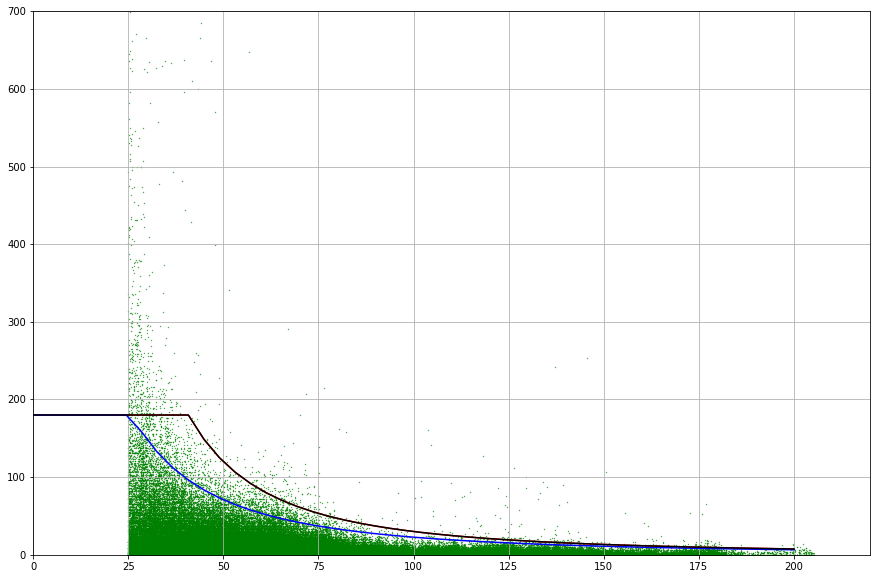

In [12]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
steering_wheel_speed = swas.diff()
framerate = 15
steering_wheel_speed *= framerate
speeds = multi_train_dataset.get_csv()['speed']

swas

#remove -999 dummy speed value
no_speeds_indices = speeds[speeds < 0].index
#speeds = speeds.drop(no_speeds_indices)
#steering_wheel_speed = steering_wheel_speed.drop(no_speeds_indices)


steering_wheel_speed = abs(steering_wheel_speed)


plt.figure(figsize=(15,10))
plt.grid(True)

plt.scatter(x=speeds, y=steering_wheel_speed, s=.1, color='green')

vel = np.linspace(0, 200)
envelope = 300000/(vel**2)
envelope2 = 300000/((vel+15)**2)
envelope3 = 300000/(vel**2)

envelope = np.clip(envelope, 0, 180)
envelope2 = np.clip(envelope2, 0, 180)
envelope3 = np.clip(envelope3, 0, 180)

plt.plot(vel, envelope, color='red')
plt.plot(vel, envelope2, color='blue')
plt.plot(vel, envelope3, color='black')

plt.xlim(0, 220)
plt.ylim(0, 700)
plt.show()

# SWA normalization

In [13]:
dummy_dataset = RoadDataset('','',[''])
dummy_dataset.normalize_swa(180)

Reading csv file: 
Failed to read csv file!
Loaded dataset with 0 samples


1.1277148766292124

In [14]:
dummy_dataset.denormalize_swa(1.5539)

998.9923936748692

In [15]:
swas = multi_train_dataset.get_csv()['steering_wheel_angle']
normed_swas = [dummy_dataset.normalize_swa(swa) for swa in swas]

In [16]:
max_normed_swa = max(np.abs(normed_swas))
print(max_normed_swa)

1.1271923529254342


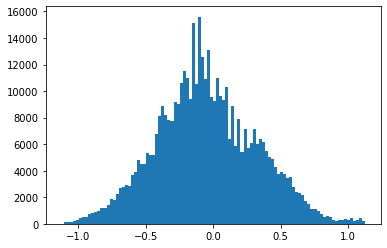

In [17]:
plt.hist(normed_swas, bins=100)
plt.show()